# Introduction to Reinforcement Learning through Epsilon Greedy Algorithm

Reference article for the following explanation : https://medium.com/analytics-vidhya/the-epsilon-greedy-algorithm-for-reinforcement-learning-5fe6f96dc870

## What is Reinforcement Learning ? 

Reinforcement learning is a subtype of artificial intelligence which is based on the idea that a computer learn as humans do — through trial and error. It aims for computers to learn and improve from experience rather than being explicitly instructed.

But, how does the computer know to do this?

Well, by using a learning algorithm.

Learning algorithms are mathematical tools implemented by the programmer which allow the agent to effectively conduct trial and error when performing a task. Learning algorithms interpret the rewards and punishments returned to the agent from the environment and use the feedback to improve the agent’s choices for the future.

## Multi-armed Bandit Problem and exploration-exploitation tradeoff 

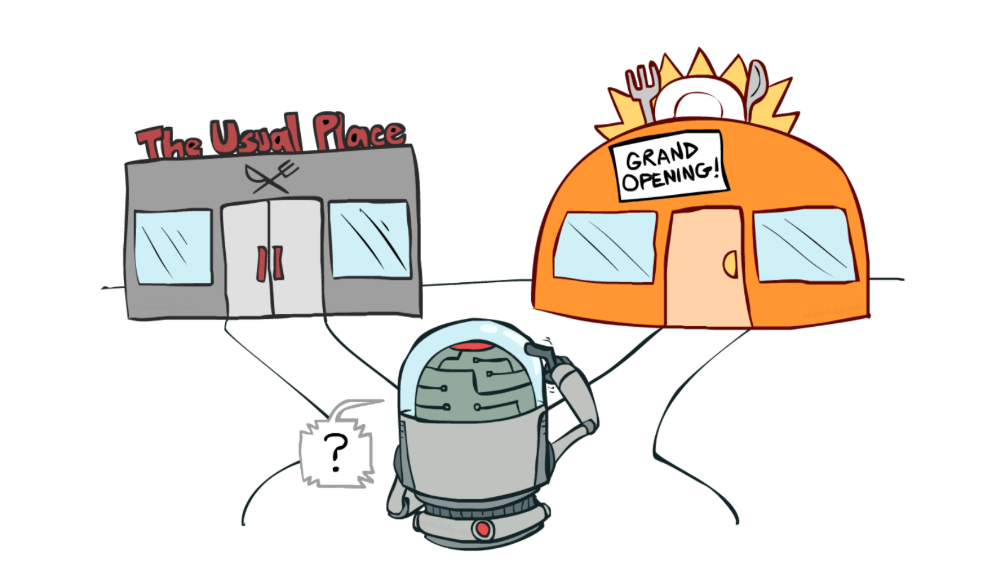

Let’s say that you and your friends are trying to decide where to eat. In the past, you’ve always gone to a Mexican restaurant around the corner, and you’ve all really enjoyed it. However, this time, one of your friends mentions that a new Lebanese place has opened up down the street, and it’s supposed to be really good. None of you guys can come to a consensus — should you go to the Mexican restaurant which you know to be really good, or should you try the Lebanese place which has the potential to be better or worse?

In reinforcement learning, our restaurant choosing dilemma is known as the exploration-exploitation tradeoff. At what point should you exploit options which you think to be the best rather than exploring options which have the potential to be better or worse (or vice-versa)?

This tradeoff plays into something known as the multi-armed bandit problem.

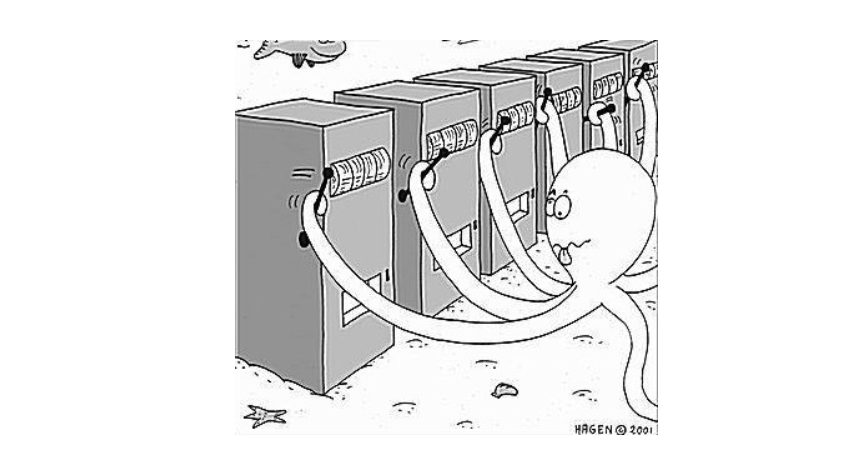

The Epsilon-Greedy Algorithm makes use of the exploration-exploitation tradeoff by

1. instructing the computer to explore (i.e. choose a random option with probability epsilon)

2. and exploit (i.e. choose the option which so far seems to be the best) the remainder of the time.

# Epilson-Greedy code 

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
NUM_TRIALS = 10000
EPS = 0.1
BANDIT_PROBABILITIES = [0.2, 0.5, 0.75]

In [5]:
class Bandit:
    def __init__(self, p):
        # p: the win rate
        self.p = p
        self.p_estimate = 0.
        self.N = 0. # num samples collected so far

    def pull(self):
        # draw a 1 with probability p
        return np.random.random() < self.p

    def update(self, x):
        self.N += 1.
        self.p_estimate = ((self.N - 1)*self.p_estimate + x) / self.N

In [8]:
def experiment():
    bandits = [Bandit(p) for p in BANDIT_PROBABILITIES]

    rewards = np.zeros(NUM_TRIALS)
    num_times_explored = 0
    num_times_exploited = 0
    num_optimal = 0
    optimal_j = np.argmax([b.p for b in bandits])
    print("optimal j:", optimal_j)

    for i in range(NUM_TRIALS):

        # use epsilon-greedy to select the next bandit
        if np.random.random() < EPS:
            num_times_explored += 1
            j = np.random.randint(len(bandits))
        else:
            num_times_exploited += 1
            j = np.argmax([b.p_estimate for b in bandits])

        if j == optimal_j:
            num_optimal += 1

        # pull the arm for the bandit with the largest sample
        x = bandits[j].pull()

        # update rewards log
        rewards[i] = x

        # update the distribution for the bandit whose arm we just pulled
        bandits[j].update(x)



    # print mean estimates for each bandit
    for b in bandits:
        print("mean estimate:", b.p_estimate)

    # print total reward
    print("total reward earned:", rewards.sum())
    print("overall win rate:", rewards.sum() / NUM_TRIALS)
    print("num_times_explored:", num_times_explored)
    print("num_times_exploited:", num_times_exploited)
    print("num times selected optimal bandit:", num_optimal)

    # plot the results
    cumulative_rewards = np.cumsum(rewards)
    win_rates = cumulative_rewards / (np.arange(NUM_TRIALS) + 1)
    plt.plot(win_rates)
    plt.plot(np.ones(NUM_TRIALS)*np.max(BANDIT_PROBABILITIES))
    plt.show()

optimal j: 2
mean estimate: 0.1455026455026455
mean estimate: 0.48059701492537316
mean estimate: 0.7492193388607725
total reward earned: 7174.0
overall win rate: 0.7174
num_times_explored: 1006
num_times_exploited: 8994
num times selected optimal bandit: 9287


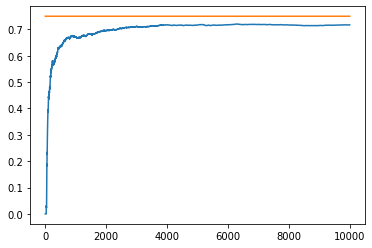

In [9]:
experiment()

# Comparison of different values of epsilons 

In [10]:
class Bandit:
    def __init__(self, m):
        self.m = m
        self.mean = 0
        self.N = 0

    def pull(self):
        return np.random.randn() + self.m

    def update(self, x):
        self.N += 1
        self.mean = (1 - 1.0/self.N)*self.mean + 1.0/self.N*x

In [13]:
def run_experiment(m1, m2, m3, eps, N):
    bandits = [Bandit(m1), Bandit(m2), Bandit(m3)]

    data = np.empty(N)

    for i in range(N):
        # epsilon greedy
        p = np.random.random()
        if p < eps:
            j = np.random.choice(3)
        else:
            j = np.argmax([b.mean for b in bandits])
        x = bandits[j].pull()
        bandits[j].update(x)

        # for the plot
        data[i] = x
    cumulative_average = np.cumsum(data) / (np.arange(N) + 1)

    # plot moving average ctr
    plt.plot(cumulative_average)
    plt.plot(np.ones(N)*m1)
    plt.plot(np.ones(N)*m2)
    plt.plot(np.ones(N)*m3)
    plt.xscale('log')
    plt.show()

    for b in bandits:
        print(b.mean)

    return cumulative_average

## Epsilon = 0.1 

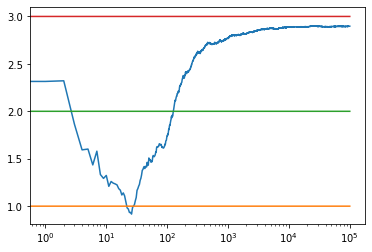

1.0124058921269363
2.003177324284297
2.999578216730318


In [17]:
c_1 = run_experiment(1.0, 2.0, 3.0, 0.1, 100000)

## Epsilon = 0.05

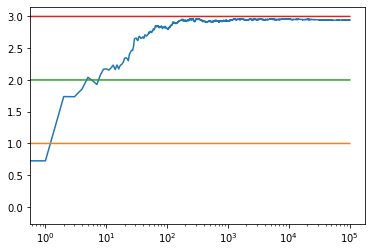

1.033887326742669
1.9751552784268689
2.993718017322371


In [16]:
c_05 = run_experiment(1.0, 2.0, 3.0, 0.05, 100000)

## Epsilon = 0.01

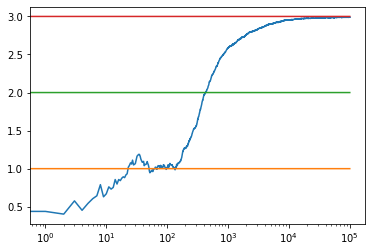

0.9718706905185743
1.9488388580628544
3.0037274647513756


In [18]:
c_01 = run_experiment(1.0, 2.0, 3.0, 0.01, 100000)

## Comparison chart

E:\Programs\Anaconda\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


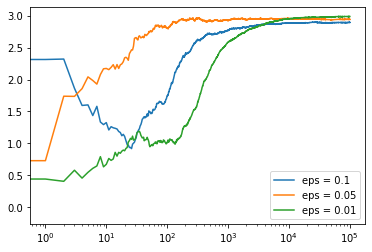

In [20]:
# log scale plot
plt.plot(c_1, label='eps = 0.1')
plt.plot(c_05, label='eps = 0.05')
plt.plot(c_01, label='eps = 0.01')
plt.legend()
plt.xscale('log')
plt.show()

The algorithm reaches higher cumulative rewards faster for eps = 0.05 and eps = 0.1 as compared to eps = 0.01. 

However, eventually eps = 0.01 has the highest cumulative reward in the end.

So , this is the speed-reward tradeoff for different epsilon values. If we want faster convergence at the cost of a potentially better solution , opt for relatviely higher values of epsilon(0.05,0.1) else opt for the lower one (0.01) for better solution.

# Optimistic Initial values

Purely greedy approach

Instead of having epsilon parameter, we set an initial value of reward mean which is higher than the maximum mean of all the machines. Hence, a large value of mean is picked which overestimates the sample mean.

This encourages the algorithm to explore more in the initial stages

Steps:

Be greedy.

Choose the bandit arm with the largest estimated mean.

Early in the experiment :

Less data

Estimated mean is large.

Later in the experiment :

Lots of data collected. Estimated mean continues to get smaller and the effect of initial value of mean diasppears.

http://incompleteideas.net/book/first/ebook/node21.html - More reading.

## Role of initial value

Extemely high = More exploration

Less high = less exploration

Hyperparameter that controls the value of exploration.

## Code

In [22]:
class Bandit:
    def __init__(self, m, upper_limit):
        self.m = m
        self.mean = upper_limit
        self.N = 1

    def pull(self):
        return np.random.randn() + self.m

    def update(self, x):
        self.N += 1
        self.mean = (1 - 1.0/self.N)*self.mean + 1.0/self.N*x


def run_experiment(m1, m2, m3, N, upper_limit=10):
    bandits = [Bandit(m1, upper_limit), Bandit(m2, upper_limit), Bandit(m3, upper_limit)]

    data = np.empty(N)
  
    for i in range(N):
        # optimistic initial values
        j = np.argmax([b.mean for b in bandits])
        x = bandits[j].pull()
        bandits[j].update(x)

        # for the plot
        data[i] = x
    cumulative_average = np.cumsum(data) / (np.arange(N) + 1)

    # plot moving average ctr
    plt.plot(cumulative_average)
    plt.plot(np.ones(N)*m1)
    plt.plot(np.ones(N)*m2)
    plt.plot(np.ones(N)*m3)
    plt.xscale('log')
    plt.show()

    for b in bandits:
        print(b.mean)

    return cumulative_average

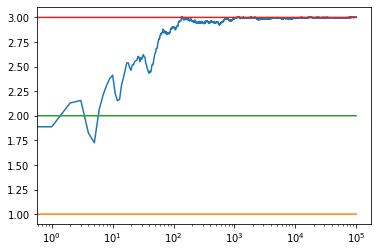

2.9222500019446707
2.9346493734203034
3.001068225834615


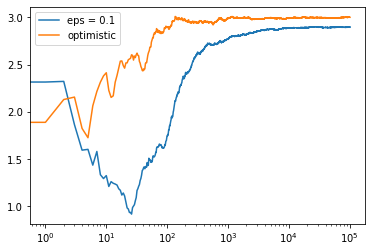

In [25]:
oiv = run_experiment(1.0, 2.0, 3.0, 100000)

# log scale plot
plt.plot(c_1, label='eps = 0.1')
plt.plot(oiv, label='optimistic')
plt.legend()
plt.xscale('log')
plt.show()

As evident in the above diagram, initially, the optimistic method performs worse because it explores more, but eventually it performs better because its exploration decreases with time.